
# MRFM_BrownianFit h5 examples
08/5/2025

## Preliminaries

### import libraries

In [13]:
import pandas as pd
from MRFM_BrownianFit.LabVIEW_int import LVprocessing
import os

### read in the data from an csv file 

(8 averages from 07/01/2025)


In [14]:
# set folder path for data if not in same folder as notebook
path = r".\\"
os.chdir(path)

# read data from csv file into data frame
df = pd.read_csv('brownian_k_20250701_8avgs.csv')


# extract data - change to column names as necessary
x= list(df['freq'])
y = list(df['power'])


# set temp and n_avgs for sample
temp = float(294.5)
n_avgs = int(8)

# check that data is read as expected
print( len(x), len(y))
print(temp, n_avgs)


2000 2000
294.5 8


## Run fit using MRFM_BrownianFit

### Use LVprocessing to initialize brownian_fit class

In [15]:
# set path to folder for saved plots and reports
path = r".\\example_outputs"

# set root name for plots and reports
name="20250701_baysian_8avgs"

#call LVprocessing class
data = LVprocessing(n_avgs, temp, x, y, name=name, path=path)


### do_fit()

c:\Users\Katri\miniconda3\envs\mrfm_emcee\lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


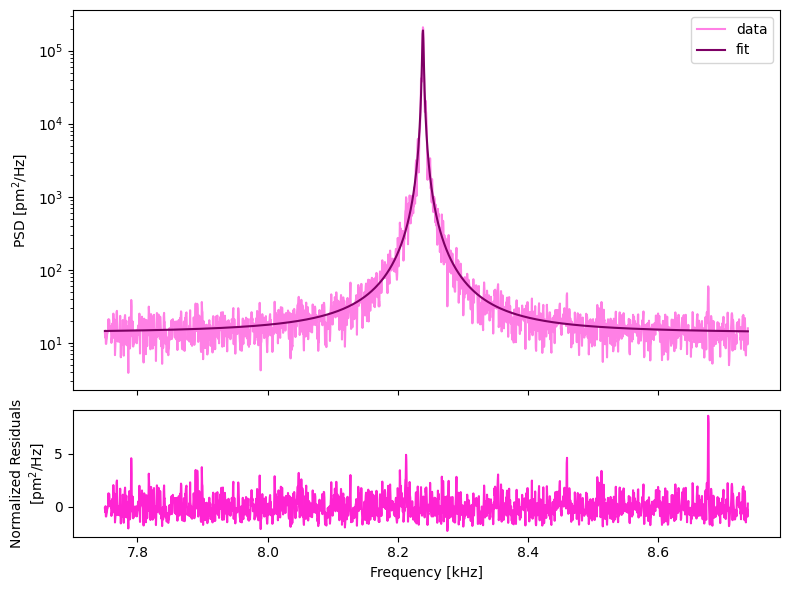

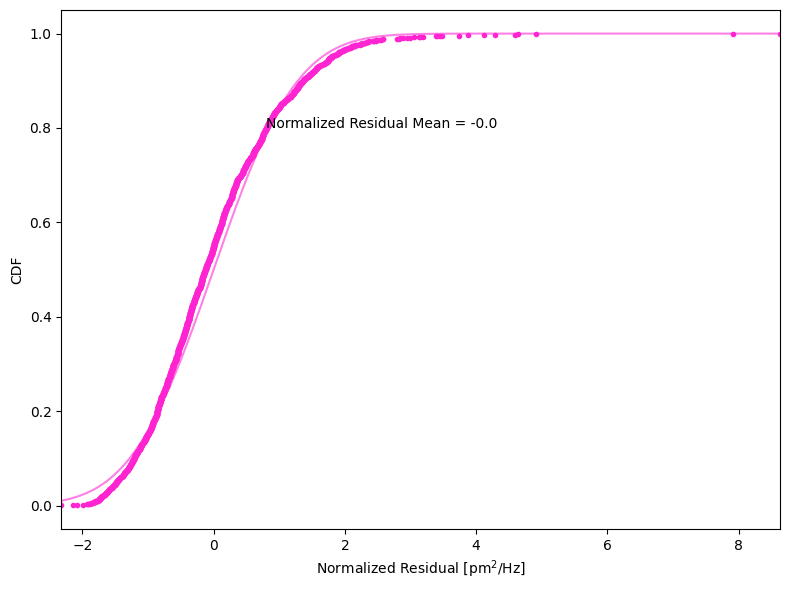

In [16]:
# run fitting function - this example will not generate the .tex report
data.do_fit()

# use brownian_fit functions to generate the fit plot and the residuals cdf
data.fit.plot_fit()
data.fit.residuals_CDF()

# print the fit summary
data.fit.result["leastsq"]

### plot_report()

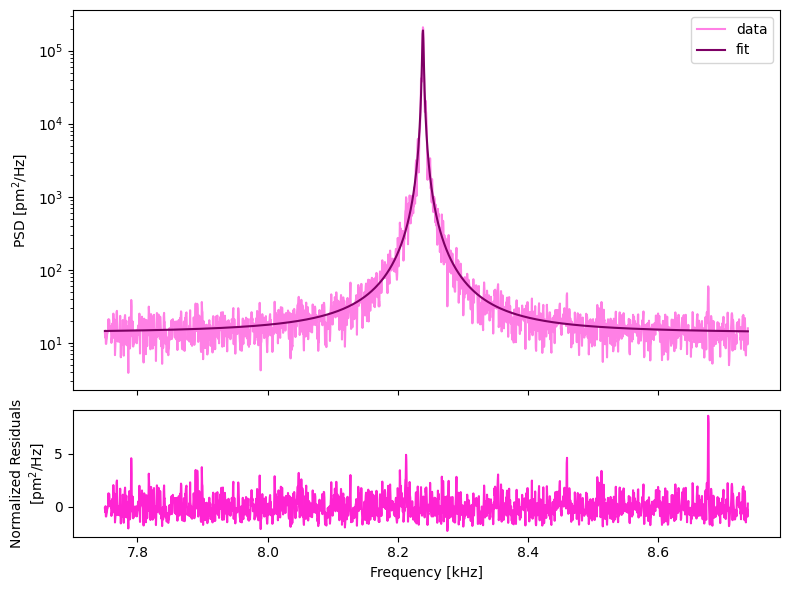

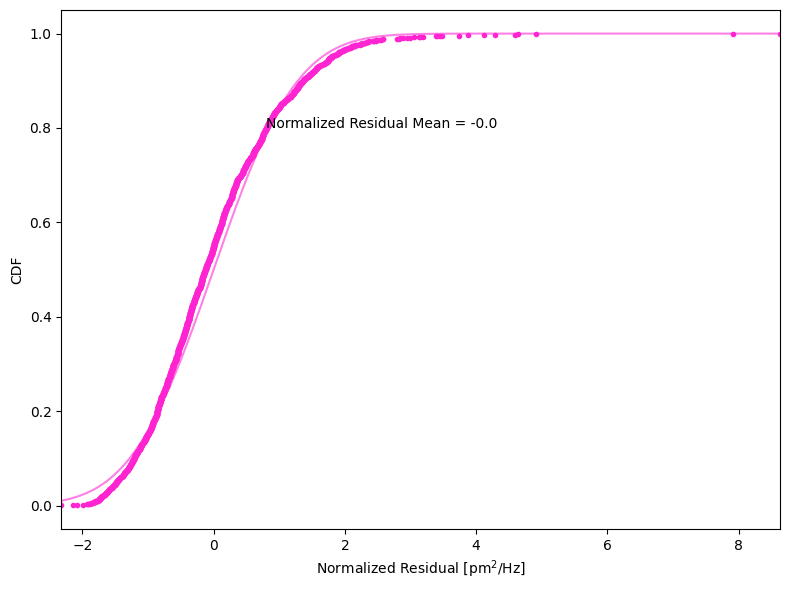

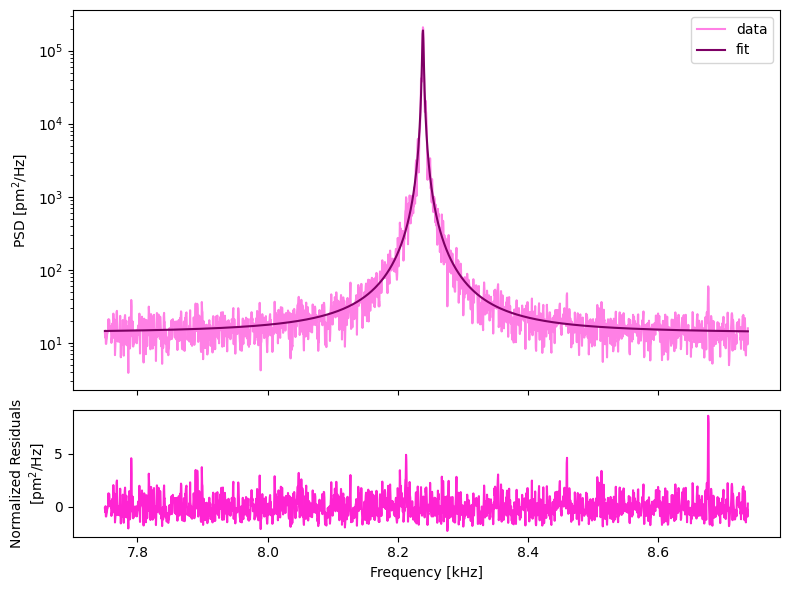

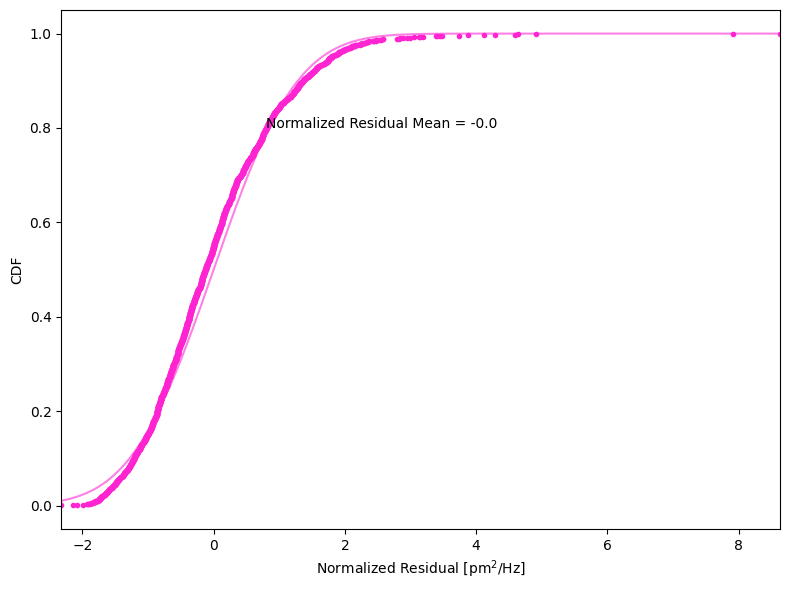

In [17]:
# run fitting function - this example will generate the .tex report
data.plot_report()

# use brownian_fit functions to generate the fit plot and the residuals cdf
data.fit.plot_fit()
data.fit.residuals_CDF()

# print the fit summary
data.fit.result["leastsq"]

## Use Bayesian methods to explore parameter distributions

### Maximum Log Likelihood Estimates

In [ ]:
# define parameter bounds for Gamma, tau0, f0, and baseline
bounds = [(1e-16,1e-7),(1,5000),(4.5,11),(1,50)]

# find maximum og likelihood estimate
data.fit.max_likelihood(bounds)

print(data.fit.bayesian_result)

{'Gamma': 3.1804362951600435e-11, 'tau0': 144.46246299980783, 'f0': 8.238886784654381, 'baseline': 13.496376489559365}


### MCMC

Running emcee sampler...


100%|██████████| 2000/2000 [00:14<00:00, 141.54it/s]


Plotting walkers...


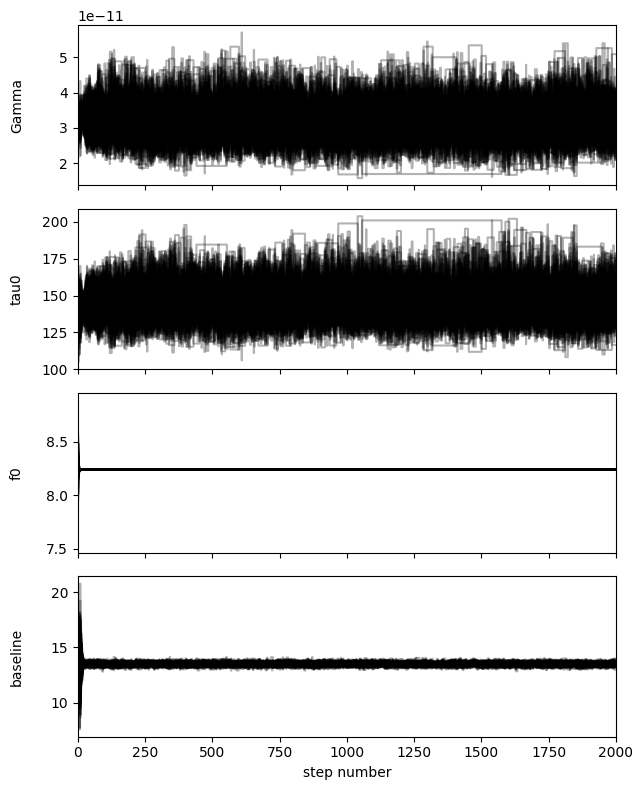

Calculating autocorrelation times...
[11.5216363  12.17510855  2.02055289  4.8839738 ]
Generating corner plots...
Done.


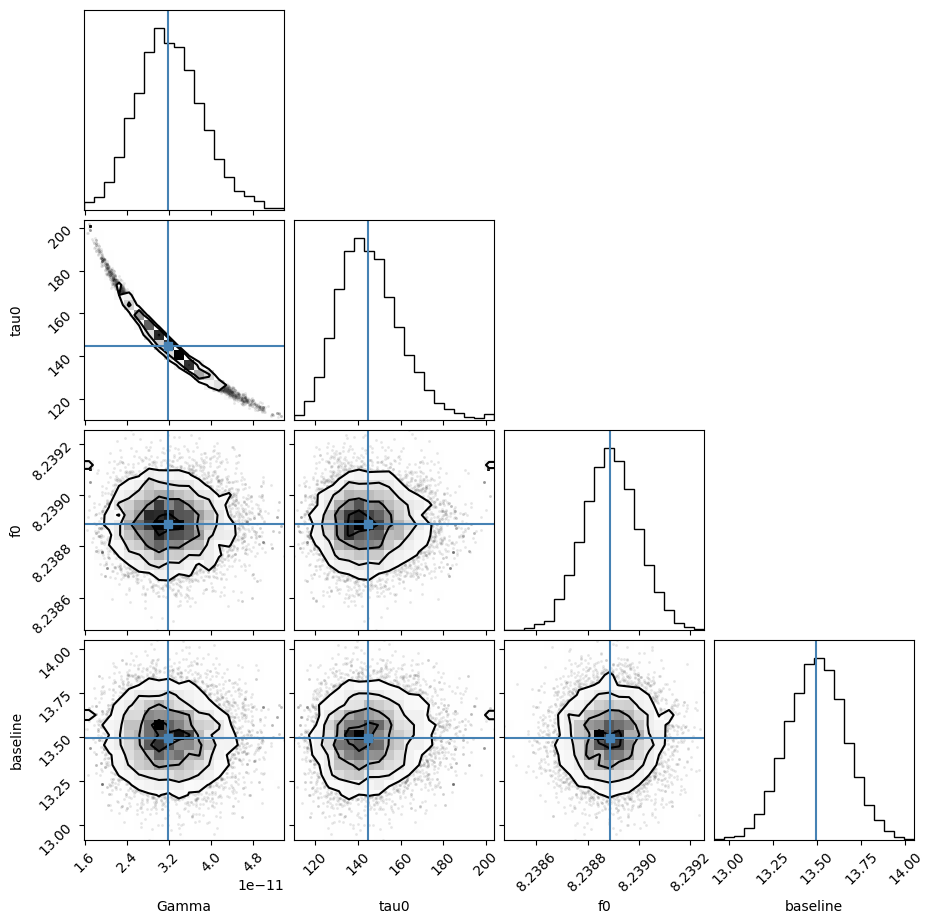

In [19]:
data.fit.MCMC(bounds, figpath = path)